In [19]:
import import_ipynb
from reccnn import RecCNN
from comcnn import ComCNN
from keras.models import Model

In [20]:
from keras.layers import Input
from keras.callbacks import ModelCheckpoint


inp2 = Input(shape=(25,50,3))
rec_cnn = RecCNN(3)
model_reccnn = Model(inp2, rec_cnn.sisr(inp2))
model_reccnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
checkpointr = ModelCheckpoint(filepath='reccnn.weights.best.hdf5', save_best_only=True, verbose=1)
model_reccnn.summary()

inp1 = Input(shape=(375,500,3))
com_cnn = ComCNN(3)
model_comcnn = Model(inp1, model_reccnn(com_cnn.compact(inp1)))
model_comcnn.layers[4].trainable = False
model_comcnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
checkpointc = ModelCheckpoint(filepath='comcnn.weights.best.hdf5', save_best_only=True, verbose=1)
model_comcnn.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 25, 50, 3)    0                                            
__________________________________________________________________________________________________
interpolate_tensor_2 (Interpola (None, 375, 500, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 375, 500, 64) 4864        interpolate_tensor_2[0][0]       
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 375, 500, 32) 18464       conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (

In [21]:
model_comcnn.load_weights('/home/chandu/Desktop/comcnn.weights.best.hdf5')

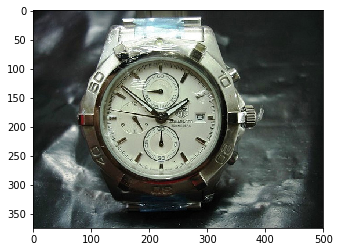

In [28]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

test_img = mpimg.imread('/home/chandu/Desktop/test_img.png')
plt.imshow(test_img)
plt.show()

In [29]:
out1 = test_img.reshape(1, 375, 500, 3)
out1 = out1.astype('float32')
out1 = out1/255
out1*=2
out1-=1

out1 = model_comcnn.predict(out1)
out1 = out1.reshape(375, 500, 3)
out1+=1
out1/=2
mpimg.imsave('/home/chandu/Desktop/out.jpeg', out1)